In [117]:
# importing necessary files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [118]:
customer_data=pd.read_csv("marketing_campaign.csv", sep="\t")
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [119]:
customer_data['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [120]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [121]:
#Prints the size of the dataset
print('Dataset Shape:', customer_data.shape)
print('-------------------------------')

#Check if any columns contain null
print('Total Nulls Per Column:')
print(customer_data.isnull().sum())

Dataset Shape: (2240, 29)
-------------------------------
Total Nulls Per Column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [122]:
# check for missing values
customer_data.isna().sum()[customer_data.isna().sum() > 0]

Income    24
dtype: int64

In [123]:
customer_data[pd.isna(customer_data['Income'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [124]:
#checking if there is any duplicate data
customer_data.duplicated().sum()

0

In [125]:
# Calculate the mean income
mean_income = customer_data['Income'].mean()

# Replace null values with the mean income
customer_data['Income'].fillna(mean_income, inplace=True)
customer_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [126]:
#Calculate percent of responses
percent_of_responses = customer_data.Response.sum()
total = customer_data.shape[0]
percent = round((percent_of_responses / total)*100, 2)

print(percent_of_responses, 'customers responded to the marketing campaign out of a total of', total, 'cutomers.')
print('Percent Responded: ' +  str(percent) + '%')

334 customers responded to the marketing campaign out of a total of 2240 cutomers.
Percent Responded: 14.91%


In [127]:
customer_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

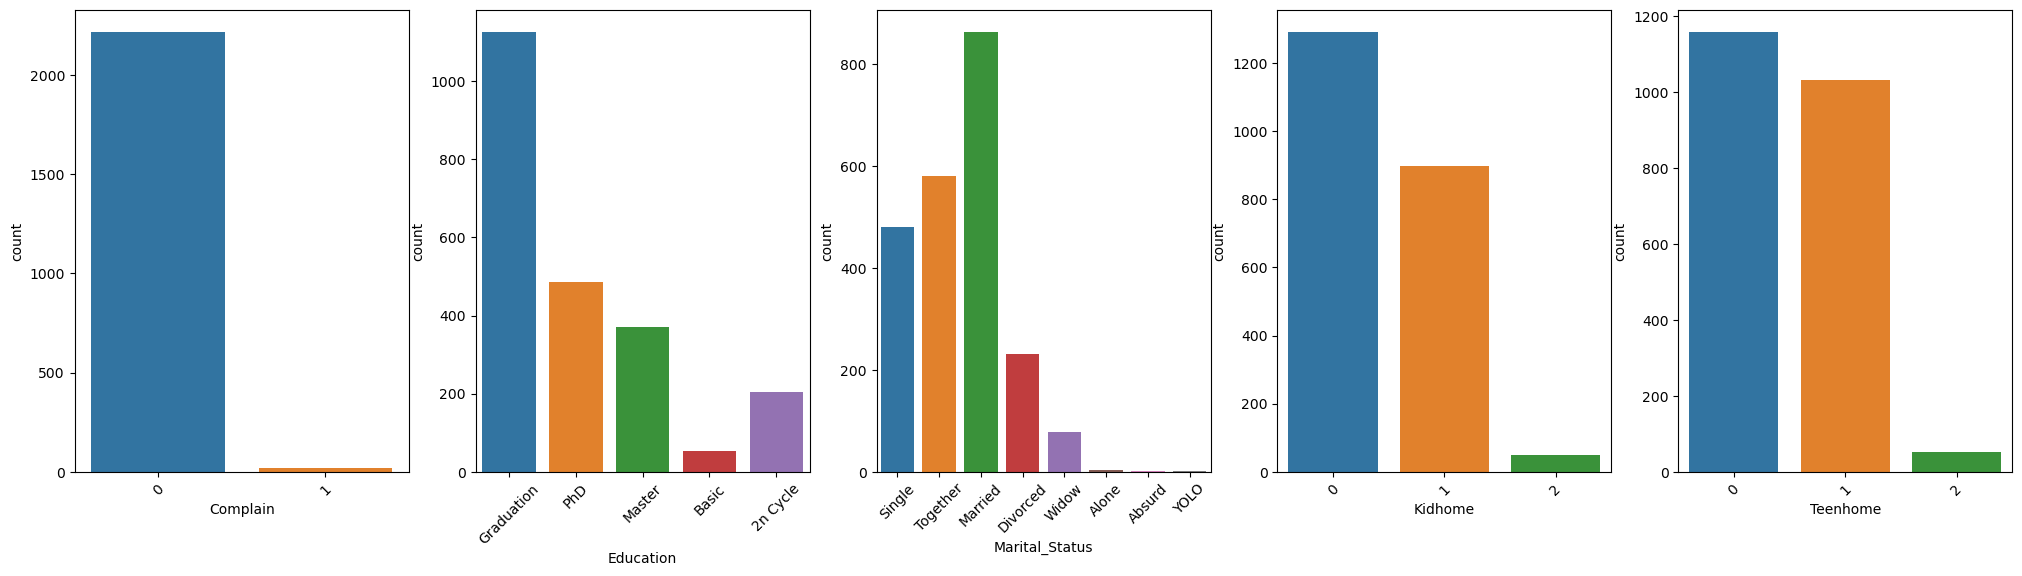

In [128]:
# lets look the features that are categorical
cal_cols = ['Complain', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']
fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=customer_data, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)
plt.show()

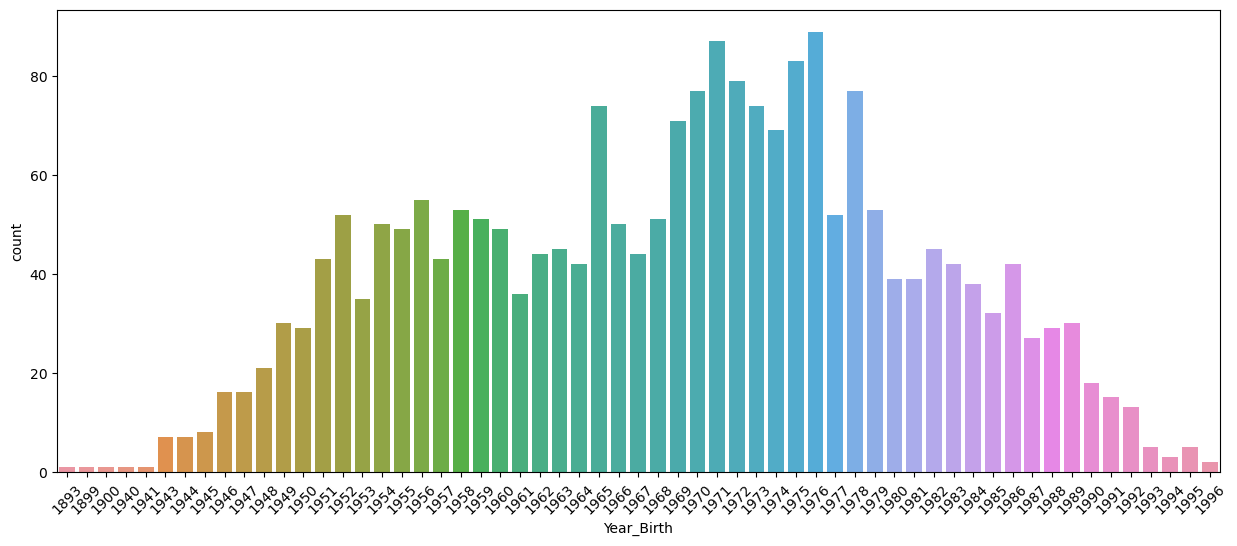

In [129]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=customer_data, x='Year_Birth')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution of Response')

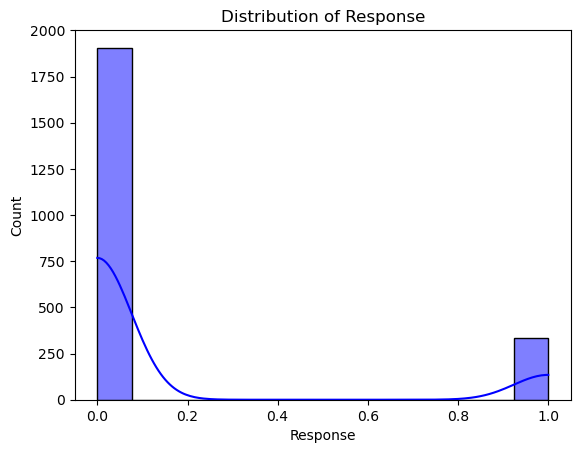

In [130]:
#plotting histplot graph for diagnosis
sns.histplot(customer_data, x='Response',color='blue', kde=True)
plt.title("Distribution of Response")

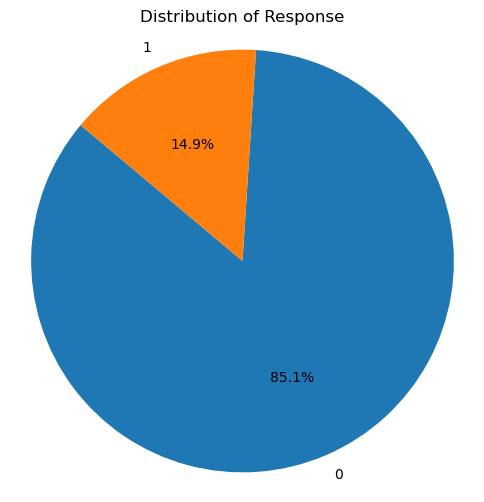

In [131]:
#Plotting pie graph to look for the percentage of disease
response_counts = customer_data["Response"].value_counts()
temp_df = pd.DataFrame({
    "Response": response_counts.index,
    "Counts": response_counts.values
})
plt.figure(figsize=(6, 6)) 
plt.pie(temp_df["Counts"], labels=temp_df["Response"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Response')  
plt.show()

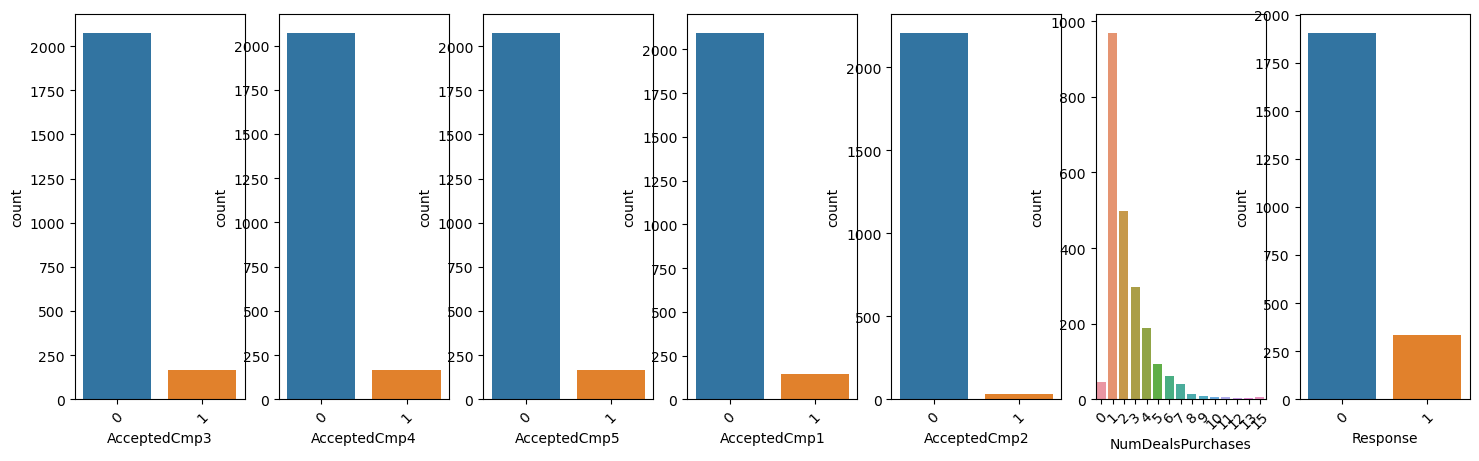

In [132]:
# lets look at the promotion features
promo_fea = customer_data.columns[(customer_data.columns.map(lambda x: 'Accepted' in x))].to_list()
promo_fea.append('NumDealsPurchases')
promo_fea.append('Response')

fig, ax = plt.subplots(1, len(promo_fea), figsize=(18, 5))
for col in enumerate(promo_fea):
    sns.countplot(data=customer_data, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)
plt.show()

<Axes: xlabel='NumWebPurchases', ylabel='NumCatalogPurchases'>

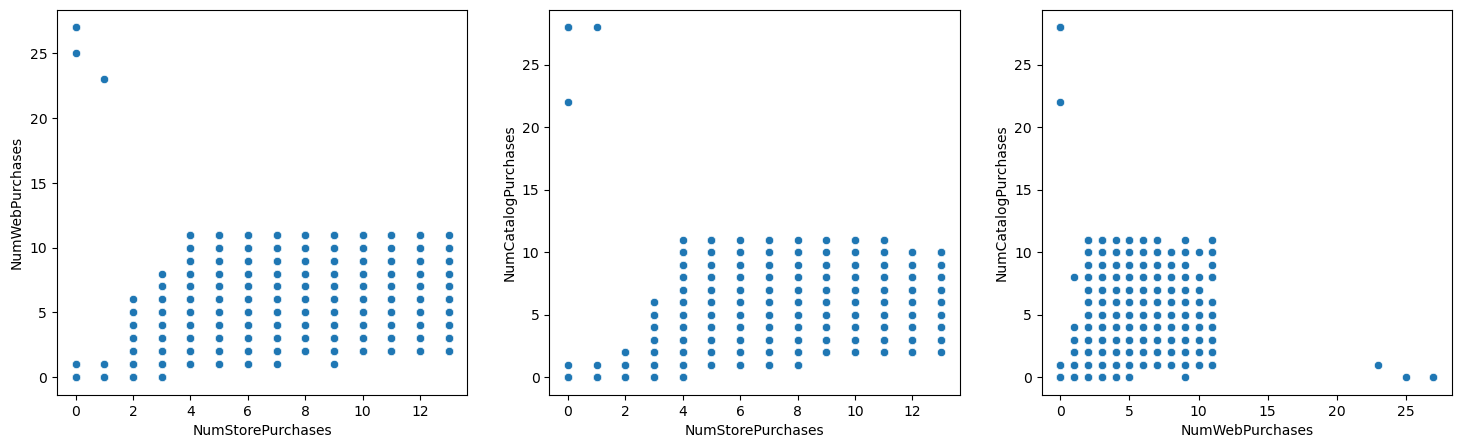

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=customer_data, x='NumStorePurchases', y='NumWebPurchases', ax=ax[0])
sns.scatterplot(data=customer_data, x='NumStorePurchases', y='NumCatalogPurchases', ax=ax[1])
sns.scatterplot(data=customer_data, x='NumWebPurchases', y='NumCatalogPurchases', ax=ax[2])

In [134]:
customer_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [135]:
customer_data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [136]:
customer_data['Z_CostContact'].isna().sum()

0

In [137]:
# Create LabelEncoder object
label_encoder = LabelEncoder()

customer_data['Education'] = label_encoder.fit_transform(customer_data['Education'])

customer_data['Marital_Status'] = label_encoder.fit_transform(customer_data['Marital_Status'])


In [138]:
# Exclude non-numeric columns from correlation computation
numeric_data = customer_data.select_dtypes(include=['number'])

# Compute correlations
correlations = numeric_data.corr()['Response']
print(correlations)


ID                    -0.021968
Year_Birth             0.021325
Education              0.090819
Marital_Status        -0.011403
Income                 0.132756
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
MntWines               0.247254
MntFruits              0.125289
MntMeatProducts        0.236335
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntGoldProds           0.139850
NumDealsPurchases      0.002238
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
NumStorePurchases      0.039363
NumWebVisitsMonth     -0.003987
AcceptedCmp3           0.254258
AcceptedCmp4           0.177019
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp2           0.169293
Complain              -0.001707
Z_CostContact               NaN
Z_Revenue                   NaN
Response               1.000000
Name: Response, dtype: float64


<Axes: xlabel='NumCatalogPurchases', ylabel='MntMeatProducts'>

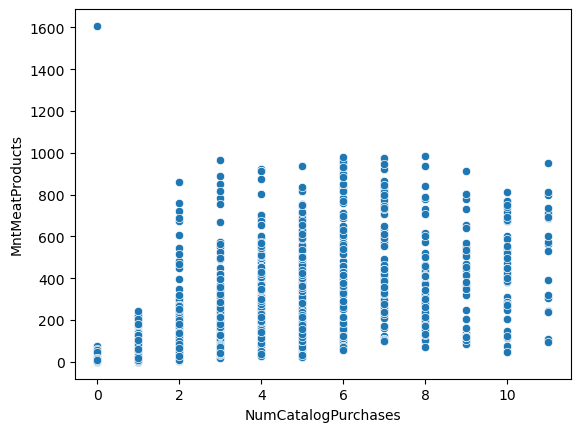

In [139]:
sns.scatterplot(data=customer_data.loc[customer_data['NumCatalogPurchases'] < 20][['NumCatalogPurchases', 'MntMeatProducts']], x='NumCatalogPurchases', y='MntMeatProducts')

In [140]:
customer_data.loc[customer_data['NumCatalogPurchases'] < 20][['NumCatalogPurchases', 'MntMeatProducts']].corr()

,NumCatalogPurchases,MntMeatProducts
NumCatalogPurchases,1.000000,0.696259
MntMeatProducts,0.696259,1.000000


In [141]:
# lets remove ID, Year_Birth, Z_CostContact, Z_Revenue
customer_data_reduced = customer_data.drop(['ID', 'Education' ,'MntFishProducts', 'MntSweetProducts', 'Complain', 'NumStorePurchases', 'Year_Birth', 'Z_CostContact', 'MntGoldProds', 'Dt_Customer', 'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Z_Revenue', 'Dt_Customer', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Recency'], axis=1)

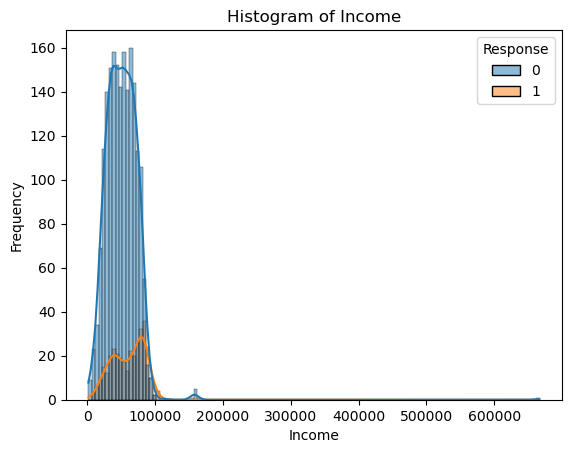

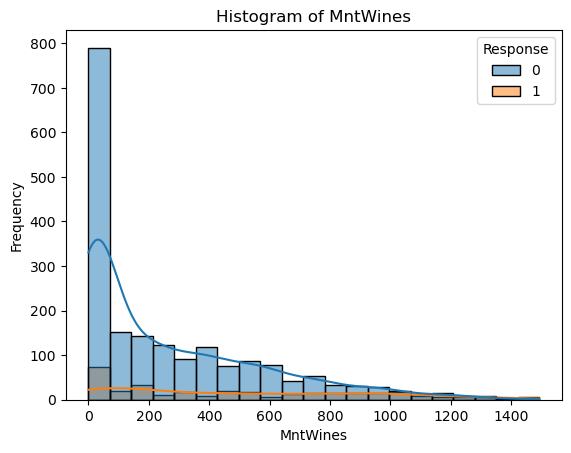

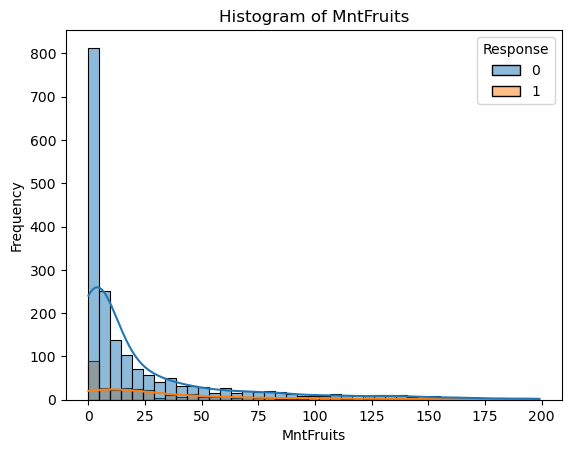

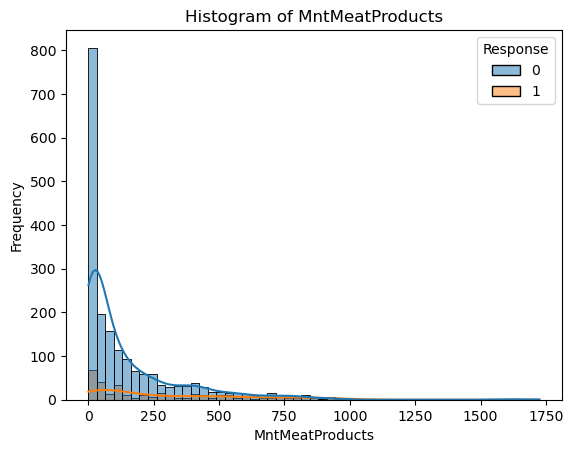

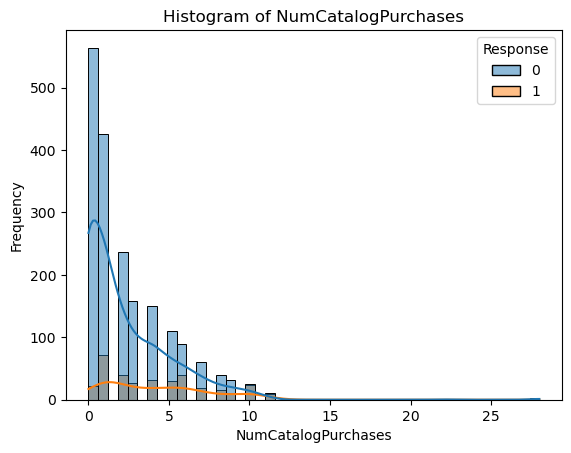

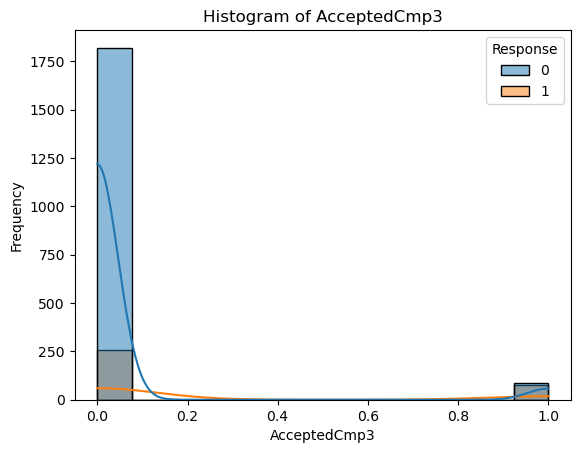

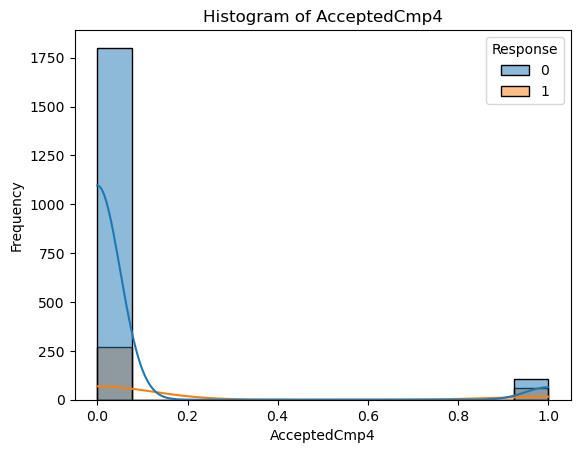

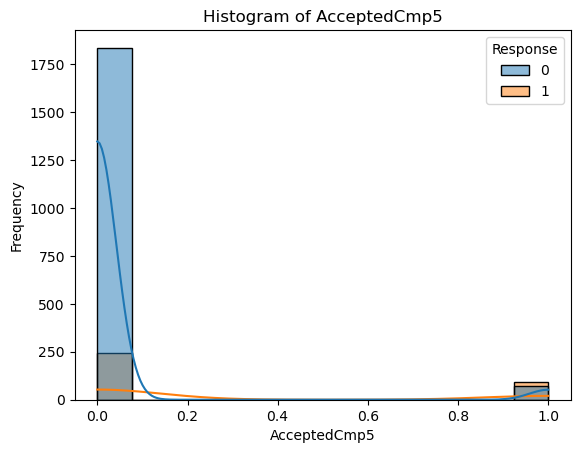

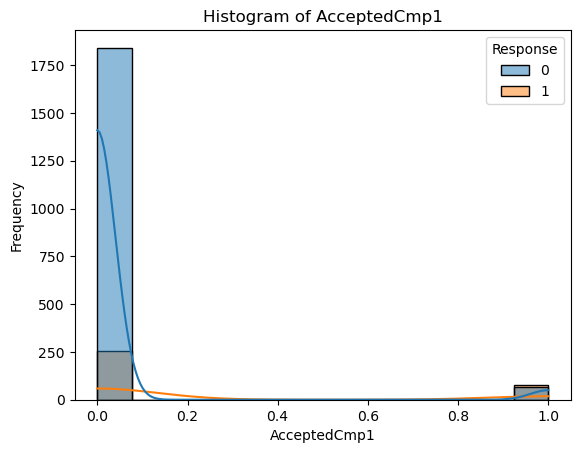

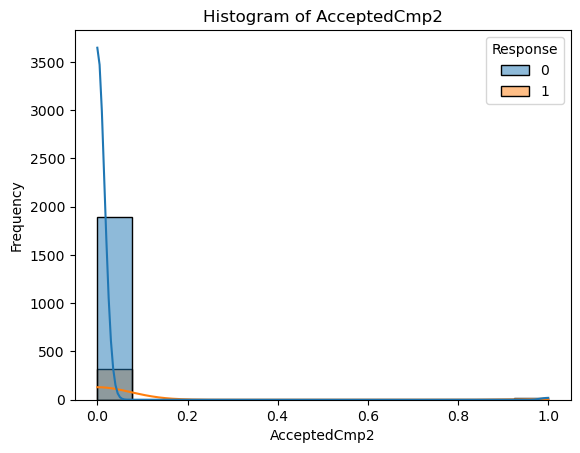

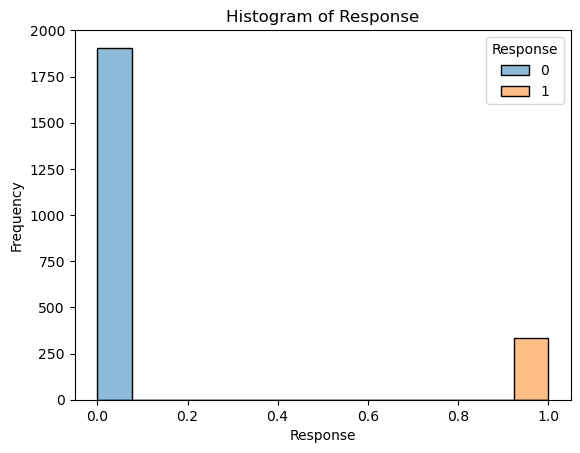

In [142]:
#plotting histplot for all the columns with relation to diagnosis to analyze data in more efficient manner
for i, column in enumerate(customer_data_reduced.columns):
    sns.histplot(data=customer_data_reduced, x=column,hue='Response', kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()